In [2]:
%pip install pandas 
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
pd.options.display.float_format = '{:,.2f}'.format # Set display options for better readability
flet =pd.read_csv('stanovanja.csv', sep=';')
hise = pd.read_csv('hise.csv', sep=';')

In [5]:
flet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NASLOV     840 non-null    object
 1   CENA       840 non-null    object
 2   OPIS       840 non-null    object
 3   m2         840 non-null    object
 4   LETO       840 non-null    int64 
 5   NASTROPJE  754 non-null    object
 6   ZEMLJISCE  75 non-null     object
dtypes: int64(1), object(6)
memory usage: 46.1+ KB


In [8]:
flet.sample(5)

,NASLOV,CENA,OPIS,m2,LETO,NASTROPJE,ZEMLJISCE
788,"TRNOVO, CESTA V MESTNI LOG","360.000,00 €","60,24 m2, 2-sobno, zgrajeno l. 1966, adaptiran...","60,24 m2",1966,1/3,NaN
306,LJ. CENTER,"1.230.000,00 €","138,15 m2, 4,5-sobno, zgrajeno l. 1905, adapti...","138,15 m2",1905,3/4,NaN
671,ROŽNA DOLINA,"1.091.320,00 €","136,59 m2, 3-sobno, novogradnja - zgr. l. 2024...","136,59 m2",2024,1/5,NaN
524,LJ. ŠIŠKA,"1.100.000,00 €","197,72 m2, 4-sobno, novogradnja - zgr. l. 2023...","197,72 m2",2023,15/15,NaN
518,LJ. ŠIŠKA,"380.000,00 €","81,3 m2, 3-sobno, zgrajeno l. 1972, adaptirano...","81,30 m2",1972,7/12,NaN


In [9]:
flet['m2']=flet['m2'].str.replace(',', '.').str.replace(' m2', '').astype(float)

In [10]:
# Clean the CENA column and extract the first valid price
flet['CENA'] = (
	flet['CENA']
	.str.replace('.', '', regex=False)
	.str.replace(',', '.', regex=False)
	.str.replace('€', '', regex=False)
	.str.extract(r'(\d+\.\d+)')[0]  # extract the first float-like number
	.astype(float)
)

In [11]:
flet['cena_m2'] = flet['CENA'] / flet['m2']

In [12]:
flet['adaptirano'] = flet['OPIS'].str.contains('adaptirano', case=False, na=False).astype(int)
# case = False makes the search case-insensitive
# na = False ensures that NaN values are treated as False
#.astype(int) converts the boolean values to integers (0 or 1)

In [13]:
flet['adaptirano'].value_counts()

adaptirano
0    495
1    345
Name: count, dtype: int64

In [15]:
import re

In [16]:
# Extract the year from the description if it exists (when 'adaptirano' is mentioned)
flet['leto_adaptacije'] = flet['OPIS'].str.extract(r'adaptirano.*?(\d{4})', flags=re.IGNORECASE)[0]

In [17]:
flet['leto_adaptacije'].unique()

array([nan, '2022', '2025', '2016', '2010', '2000', '2006', '2018',
       '2008', '2002', '2020', '2014', '2023', '2005', '2015', '2017',
       '2019', '2003', '2024', '1977', '2009', '2013', '1997', '1990',
       '2011', '2007', '2012', '1994', '2021', '1980', '2001', '1995',
       '1996', '1992', '2004'], dtype=object)

In [ ]:
#flet.to_csv('flet_blink.csv', index=True, sep=';')

In [18]:
flet['st_sob'] = flet['OPIS'].str.extract(r'(\d+)[^\d]{0,10}sobno', flags=re.IGNORECASE)[0].astype(float)

In [42]:
#print(flet[flet['st_sob'].isna()]['OPIS'])


In [19]:
maska_garsonjera = flet['st_sob'].isna() & flet['OPIS'].str.contains('garsonjera', case=False, na=False)
flet.loc[maska_garsonjera, 'st_sob'] = 0.5

In [20]:
flet.loc[224, 'st_sob'] = 0
flet.loc[233, 'st_sob'] = 0
flet.loc[253, 'st_sob'] = 2.0
flet.loc[435, 'st_sob'] = 0
flet.loc[471, 'st_sob'] = 0
flet.loc[576, 'st_sob'] = 18
flet.loc[757, 'st_sob'] = 0

Naredi: preglej vnose stanovanj, ki so bili zgrajeni pred 2000 in NISO adaptirani. Torej groupby SQL

#flet['lokacija'] 
#flet['lokacija_grouped']

In [23]:
#zanka za kraje
kraji = ['šiška', 'vič', 'center', 'bežigrad', 'moste', 'dravlje', 'tabor', 'rožna dolina', 
         'trnovo', 'šentvid', 'rudnik', 'zalog', 'črnuče', 'polje', 'rožnik', 'gameljne', 'golovec', 'trnovo', 'koseze', 
         'kodeljevo', 'brdo', 'vrhovci', 'podutik', 'ježica', 'nove jarše', 'btc', 'fužine', 'štepanjsko naselje', 'kašelj', 'sostro', 
         'šmarna gora', 'brinje', 'brod', 'bs 3', 'črna vas', 'dobrunje', 'dolgi most', 'draveljska gmajna', 'galjevica', 'kolezija', 'litostroj', 
         'medno', 'mirje', 'murglje', 'nadgorica', 'poljane', 'prule', 'rakova jelša', 'savsko naselje', 'stanežiče', 'stara lj.', 'stožice', 'šentjakob', 'štepanja vas', 'tacen', 
         'tomačevo', 'tacen', 'tomačevo', 'vižmarje', 'vodmat', 'zelena jama', 'žale', 'zupančičeva jama', 'murgle', 'rakovnik', 'sneberje']

def extract_kraji(opis):
    for kraj in kraji:
        if kraj in opis.lower():
            return kraj
    else:
        return opis
    
flet['kraj'] = flet['OPIS'].apply(extract_kraji)

In [24]:
flet['kraj'].unique()

array(['85,2 m2, 3-sobno, novogradnja, začetek gradnje l. 2024, 1. nad., Trosobno stanovanje E2.S4/1N se nahaja v prvem nadstrop... ...',
       '107,45 m2, 4-sobno, novogradnja, začetek gradnje l. 2024, 1. nad., Štirisobno stanovanje E1.S4/1N se nahaja v prvem nads... ...',
       '110,4 m2, 3-sobno, novogradnja - zgr. l. 2024, 1. nad., Štirisobno stanovanje E4.S4/1N_A se nahaja v 1. nadstropju objek... ...',
       '112,5 m2, 3-sobno, novogradnja, začetek gradnje l. 2024, pritličje, Trisobno stanovanje E2.S1/P_A se nahaja v pritličju ... ...',
       '162,91 m2, 4-sobno, novogradnja, začetek gradnje l. 2024, pritličje, Štirisobno stanovanje E1.S3/P se nahaja v pritličju... ...',
       '59 m2, 2-sobno, zgrajeno l. 2005, P/2 nad., 45 m2 terase, 4 m2 shramba,na Dunajski cesti, v urejenem vila bloku,mirna lo... ...',
       '104,3 m2, 3-sobno, zgrajeno l. 2025, 257 m2 zemljišča, 2/2 nad., prodamo. Cena: 489.000,00 EUR ...',
       '78,9 m2, 3-sobno, zgrajeno l. 1927, adaptirano l. 2022,

In [25]:
kraji1 = ['bežigrad', 'črnuče', 'dravlje', 'center', 'moste', 'šiška',
       'nove jarše', 'podutik', 'rožna dolina', 'rudnik', 'brdo',
       'brinje', 'brod', 'bs 3', 'btc', 'črna vas', 'dobrunje',
       'dolgi most', 'draveljska gmajna', 'fužine', 'galjevica', 'ježica',
       'kodeljevo', 'kolezija', 'koseze', 'litostroj', 'vič', 'medno',
       'mirje', 'murgle', 'trnovo', 'nadgorica', 'poljane', 'polje',
       'prule', 'rakova jelša', 'rakovnik', 'savsko naselje', 'sneberje',
       'gameljne', 'stanežiče', 'stara lj.', 'stožice', 'šentjakob',
       'šentvid', 'štepanja vas', 'štepanjsko naselje', 'tabor', 'tacen',
       'tomačevo', 'vižmarje', 'vodmat', 'zalog', 'zelena jama', 'kašelj',
       'zupančičeva jama']

In [26]:
kraj_to_mestna_cetrt = {
    # Bežigrad
    'bežigrad': 'Bežigrad',
    'brinje': 'Bežigrad',
    'ježica': 'Posavje',
    'savsko naselje': 'Bežigrad',
    'stožice': 'Posavje',
    'tomačevo': 'Posavje',
    'zupančičeva jama': 'Bežigrad',

    # Center
    'center': 'Center',
    'mirje': 'Center',
    'poljane': 'Center', 
    'prule': 'Center',
    'rožna dolina': 'Rožnik',
    'stara lj.': 'Center',
    'tabor': 'Center',

    # Črnuče
    'črnuče': 'Črnuče',
    'brod': 'Šentvid',
    'nadgorica': 'Črnuče',
    'šentjakob': 'Šentvid',

    # Dravlje
    'dravlje': 'Dravlje',
    # (ni dodatnih naselij v tvojem seznamu)

    # Jarše
    'nove jarše': 'Jarše',
    'bs 3': 'Jarše',
    'btc': 'Jarše',
    'zelena jama': 'Jarše',
    'jarše': 'Jarše',       # dodano kot splošna referenca

    # Moste
    'moste': 'Moste',
    'fužine': 'Moste',
    'kodeljevo': 'Moste',
    'štepanja vas': 'Golovec',
    'štepanjsko naselje': 'Golovec',
    'vodmat': 'Moste',
    'selo': 'Moste',        # Selo pripada Mostem :contentReference[oaicite:6]{index=6}

    # Polje
    'polje': 'Polje',

    # Posavje
    # (v tvojem seznamu ni naselij, ki spadajo izključno sem)

    # Rožnik
    'vič': 'Vič',
    'brdo': 'Rožnik',
    'dolgi most': 'Vič',
    'vrhovce': 'Rožnik',

    # Rudnik
    'rudnik': 'Rudnik',
    'črna vas': 'Rudnik',
    'galjevica': 'Rudnik',
    'rakova jelša': 'Rudnik',
    'rakovnik': 'Rudnik',

    # Sostro
    'dobrunje': 'Sostro',
    'nadgorica': 'Črnuče',
    'kašelj': 'Sostro',
    'sneberje': 'Sostro',
    'zalog': 'Sostro',

    # Šentvid
    'šentvid': 'Šentvid',
    'medno': 'Šentvid',
    'vižmarje': 'Šentvid',
    'gunclje': 'Šentvid',
    'stanežiče': 'Šentvid',

    # Šiška
    'šiška': 'Šiška',
    'draveljska gmajna': 'Dravlje',
    'koseze': 'Šiška',
    'litostroj': 'Šiška',
    'podutik': 'Šiška',

    # Šmarna gora
    'šmarna gora': 'Šmarna gora',
    'gameljne': 'Šmarna gora',
    'stanežiče': 'Šmarna gora',
    'tacen': 'Šmarna gora',

    # Trnovo
    'trnovo': 'Trnovo',
    'murgle': 'Trnovo',

    # Vič
    'kolezija': 'Vič',
    'glince': 'Vič'
}


In [27]:
flet['mestna_cetrt'] = flet['kraj'].map(kraj_to_mestna_cetrt)


In [28]:
flet.head()

,NASLOV,CENA,OPIS,m2,LETO,NASTROPJE,ZEMLJISCE,cena_m2,adaptirano,leto_adaptacije,st_sob,kraj,mestna_cetrt
0,"BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA","460,457.99","85,2 m2, 3-sobno, novogradnja, začetek gradnje...",85.20,2024,1,NaN,"5,404.44",0,NaN,3.00,"85,2 m2, 3-sobno, novogradnja, začetek gradnje...",NaN
1,"BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA","576,250.99","107,45 m2, 4-sobno, novogradnja, začetek gradn...",107.45,2024,1,NaN,"5,362.97",0,NaN,4.00,"107,45 m2, 4-sobno, novogradnja, začetek gradn...",NaN
2,"BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA","488,949.30","110,4 m2, 3-sobno, novogradnja - zgr. l. 2024,...",110.40,2024,1,NaN,"4,428.89",0,NaN,3.00,"110,4 m2, 3-sobno, novogradnja - zgr. l. 2024,...",NaN
3,"BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA","570,648.89","112,5 m2, 3-sobno, novogradnja, začetek gradnj...",112.50,2024,P,NaN,"5,072.43",0,NaN,3.00,"112,5 m2, 3-sobno, novogradnja, začetek gradnj...",NaN
4,"BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA","777,582.99","162,91 m2, 4-sobno, novogradnja, začetek gradn...",162.91,2024,P,NaN,"4,773.08",0,NaN,4.00,"162,91 m2, 4-sobno, novogradnja, začetek gradn...",NaN


In [51]:
flet['mestna_cetrt'] = flet['kraj'].map(kraj_to_mestna_cetrt).fillna('Neznano')


In [52]:
flet['mestna_cetrt'].value_counts()


mestna_cetrt
Center         246
Bežigrad       124
Šiška          105
Vič             67
Moste           52
Rožnik          37
Rudnik          29
Šentvid         28
Jarše           24
Dravlje         21
Črnuče          19
Posavje         19
Trnovo          13
Šmarna gora     10
Sostro           9
Polje            7
Golovec          5
Neznano          1
Name: count, dtype: int64

In [53]:
#flet['kraj'].value_counts()

In [54]:
flet.info()


<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 576
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NASLOV           815 non-null    object 
 1   CENA             815 non-null    float64
 2   OPIS             815 non-null    object 
 3   m2               815 non-null    float64
 4   LETO             815 non-null    float64
 5   NASTROPJE        734 non-null    object 
 6   ZEMLJISCE        76 non-null     object 
 7   cena_m2          815 non-null    float64
 8   adaptirano       815 non-null    float64
 9   leto_adaptacije  346 non-null    object 
 10  st_sob           816 non-null    float64
 11  kraj             815 non-null    object 
 12  mestna_cetrt     816 non-null    object 
dtypes: float64(6), object(7)
memory usage: 121.5+ KB


Korekcija tipov podatkov:


In [55]:
pd.set_option('display.max_rows', None)

In [56]:
flet['adaptirano'].value_counts()

adaptirano
0.00    467
1.00    348
Name: count, dtype: int64

In [57]:
flet = flet.drop(576)

Komentar: nadstropja? ali so pomembna? 
V primeru zemljišč... ali tovrstna stanovanje izločimo?


In [58]:
flet['st_sob'].value_counts().sum()

np.int64(815)

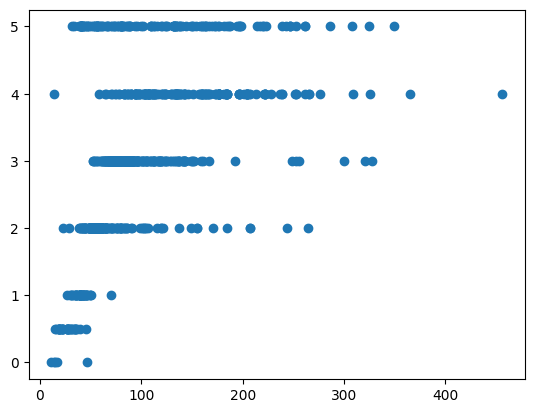

In [59]:
# Drop rows with missing values in 'm2' or 'st_sob' before plotting
flet_clean = flet.dropna(subset=['m2', 'st_sob'])
plt.scatter(data=flet_clean, x='m2', y='st_sob')

In [60]:
sobnost = flet.groupby('st_sob')['m2'].mean()

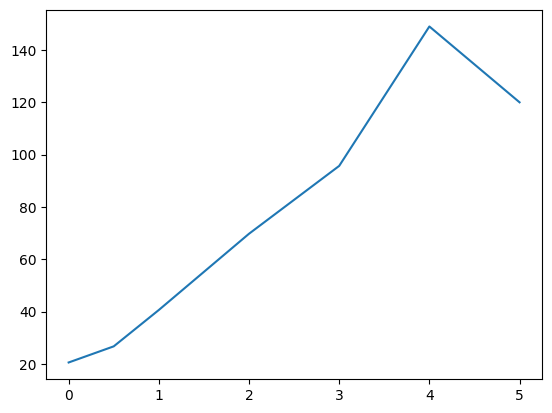

In [61]:
plt.plot(sobnost)

In [ ]:
#prikaz stanovanj, ki imajo pripradajoče zemljišče. Stanovanja, ki nimajo zemljišča so bila 'NaN'.
zemljisce = flet[flet['ZEMLJISCE'].notna()]
zemljisce

Stanovanja z pripradajočimi zemljišči so v veliki večini atipična. Zato jih je potrebno ločiti na tipična stanovanja (brez zemljišča) in atipična (s pripadajočimi vrtovi in atriji).

Ločimo še stanovanja, ki so adaptirana in tista ki niso, ter naredimo nov stolpec o sobnosti. Nekatera stanovanja so veliko premajhna za 4 sobnost itd.

In [63]:
flet['sobnost_ocenjena'] = flet['m2']

In [64]:
fleti = pd.DataFrame(flet)


In [65]:
fleti.head()

,NASLOV,CENA,OPIS,m2,LETO,NASTROPJE,ZEMLJISCE,cena_m2,adaptirano,leto_adaptacije,st_sob,kraj,mestna_cetrt,sobnost_ocenjena
0,"BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA","460,457.99","BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA, 85...",85.20,"2,024.00",1,NaN,"5,404.44",0.00,NaN,3.00,bežigrad,Bežigrad,85.20
1,"BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA","576,250.99","BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA, 10...",107.45,"2,024.00",1,NaN,"5,362.97",0.00,NaN,4.00,bežigrad,Bežigrad,107.45
2,"BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA","488,949.30","BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA, 11...",110.40,"2,024.00",1,NaN,"4,428.89",0.00,NaN,3.00,bežigrad,Bežigrad,110.40
3,"BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA","570,648.89","BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA, 11...",112.50,"2,024.00",P,NaN,"5,072.43",0.00,NaN,3.00,bežigrad,Bežigrad,112.50
4,"BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA","777,582.99","BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA, 16...",162.91,"2,024.00",P,NaN,"4,773.08",0.00,NaN,4.00,bežigrad,Bežigrad,162.91


📚 Osnova za lestvico sobnosti po kvadraturi, ki sem ti jo predlagal, izhaja iz kombinacije:
Slovenskih standardov in zakonodaje (minimalni standardi):

Pravilnik o minimalnih tehničnih zahtevah za stanovanja navaja, da mora imeti enosobno stanovanje vsaj 28–30 m², dvosobno pa vsaj 45 m².

Standardna otroška soba ~8–10 m², spalnica ~12–14 m², dnevna soba ~18–25 m², kopalnica ~5 m², kuhinja 6–8 m².

Splošnih urbanističnih norm (in prakse nepremičninskih agencij):

V praksi se 2-sobna stanovanja gibljejo med 45–60 m², 3-sobna med 60–75 m², itd.

5-sobno stanovanje z 100 m² pomeni, da je vsaka soba mikro enota.

Logike dejanske uporabnosti prostora:

Površina stanovanja mora sorazmerno rasti s številom uporabnih sob. Če ima 100 m² 5 sob, pomeni da so pod-standardno velike ali da nimajo ločenih prostorov (npr. hodnika, utilitya, shramb ipd.).

| Kvadratura (m²) | Ocenjena sobnost |
| --------------- | ---------------- |
| < 35            | 1                |
| 35–50           | 2                |
| 51–70           | 3                |
| 71–90           | 4                |
| 91–110          | 5                |
| > 110           | 6+               |


In [66]:
def oceni_sobnost(m2):
    if pd.isna(m2):
        return None
    if m2 < 35:
        return 1
    elif m2 < 50:
        return 2
    elif m2 < 70:
        return 3
    elif m2 < 90:
        return 4
    elif m2 < 110:
        return 5
    else:
        return 6



In [71]:
fleti['sobnost_ocenjena'] = fleti['m2'].apply(oceni_sobnost)


In [72]:
fleti[['OPIS','st_sob', 'sobnost_ocenjena']].dropna().sample(10) # primerjava oglaševane sobnosti z ocenjeno.


,OPIS,st_sob,sobnost_ocenjena
202,"LJ. BEŽIGRAD, FUNKCINALNO, ČUDOVIT RAZGLED, 42...",1.00,2
330,"LJ. CENTER, 184,4 m2, 4-sobno, zgrajeno l. 200...",4.00,6
677,"RUDNIK, 143,4 m2, 4-sobno, zgrajeno l. 2015, p...",4.00,6
408,"LJ. CENTER, POLJANSKA CESTA 9, 18,7 m2, garson...",0.50,1
397,"LJ. CENTER, MIKLOŠIČEVA CESTA, 239 m2, 4-sobno...",4.00,6
135,"LITOSTROJ, 78,5 m2, 2-sobno, zgrajeno l. 1952,...",2.00,4
698,"SP. ŠIŠKA, 56,4 m2, 2,5-sobno, zgrajeno l. 200...",5.00,3
747,"ŠENTVID, 88,7 m2, 3-sobno, zgrajeno l. 1986, a...",3.00,4
30,"BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA, 13...",3.00,6
784,"ZALOG, 64 m2, 4-sobno, zgrajeno l. 1997, adapt...",4.00,3


In [74]:
fleti.to_csv('fleti_cleaned', index=False)

In [75]:
fleti.head()

,NASLOV,CENA,OPIS,m2,LETO,NASTROPJE,ZEMLJISCE,cena_m2,adaptirano,leto_adaptacije,st_sob,kraj,mestna_cetrt,sobnost_ocenjena
0,"BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA","460,457.99","BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA, 85...",85.20,"2,024.00",1,NaN,"5,404.44",0.00,NaN,3.00,bežigrad,Bežigrad,4
1,"BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA","576,250.99","BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA, 10...",107.45,"2,024.00",1,NaN,"5,362.97",0.00,NaN,4.00,bežigrad,Bežigrad,5
2,"BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA","488,949.30","BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA, 11...",110.40,"2,024.00",1,NaN,"4,428.89",0.00,NaN,3.00,bežigrad,Bežigrad,6
3,"BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA","570,648.89","BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA, 11...",112.50,"2,024.00",P,NaN,"5,072.43",0.00,NaN,3.00,bežigrad,Bežigrad,6
4,"BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA","777,582.99","BEŽIGRAJSKI DVOR, BEŽIGRAD, ČERINOVA ULICA, 16...",162.91,"2,024.00",P,NaN,"4,773.08",0.00,NaN,4.00,bežigrad,Bežigrad,6


In [79]:
fleti.to_csv('fleti.csv', sep=';', index=False, encoding='utf-8')
